<a href="https://colab.research.google.com/github/andymacale/progetto_lab/blob/main/progetto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -r requirements.txt

In [ ]:
# Importazione delle librerie
import rawpy # per caricare le immagini in formato RAW
import imageio # per gestire l'IO delle immagini

In [ ]:
from google.colab import files
path = files.upload()

Saving DSC_0118.NEF to DSC_0118 (1).NEF


In [ ]:
if path:
    try:
       nome = list(path.keys())[0]
       with rawpy.imread(nome) as raw:
          immagine = raw.postprocess()
    except:
        print('Formato immagine non valido!')

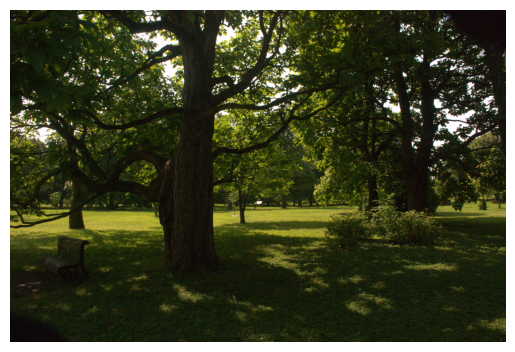

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def stampaImmagine(dati):
  plotImmagine = plt.imshow(dati)
  plt.axis('off')
  plt.show()

stampaImmagine(immagine)

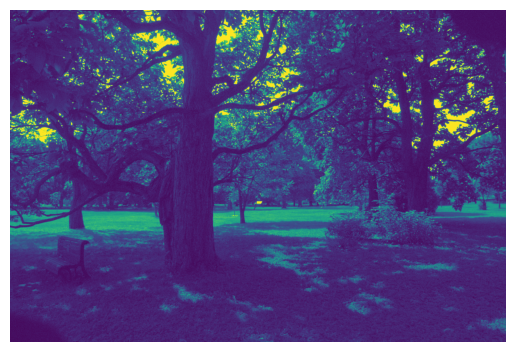

In [ ]:
# Conversione dati immagine da RGB a YCbCr
from PIL import Image
import numpy as np

datiRGB = Image.fromarray(immagine)
datiYCbCr = datiRGB.convert('YCbCr')

y, cb, cr = datiYCbCr.split()
stampaImmagine(y)

In [ ]:
# Equalizzatore dell'istogramma sulla componente y
import cv2
ascissa, ordinata = np.shape(y)
yArray = np.array(y)
yEqArray = cv2.equalizeHist(yArray) # Istogramma
yEq = Image.fromarray(yEqArray)
datiImmagineEqualizzataYCbCr = Image.merge('YCbCr', (yEq, cb, cr)) # Inserimento della y equalizzata
immagineEqualizzata = datiImmagineEqualizzataYCbCr.convert('RGB')

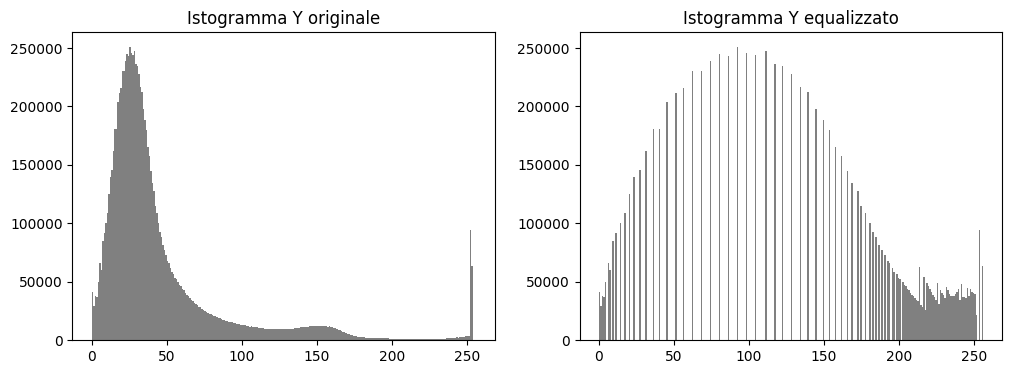

In [ ]:
# Confronto tra i due istogrammi
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(yArray.ravel(), bins=256, range=(0, 256), color='gray')
plt.title('Istogramma Y originale')

plt.subplot(1, 2, 2)
plt.hist(yEqArray.ravel(), bins=256, range=(0, 256), color='gray')
plt.title('Istogramma Y equalizzato')

plt.show()

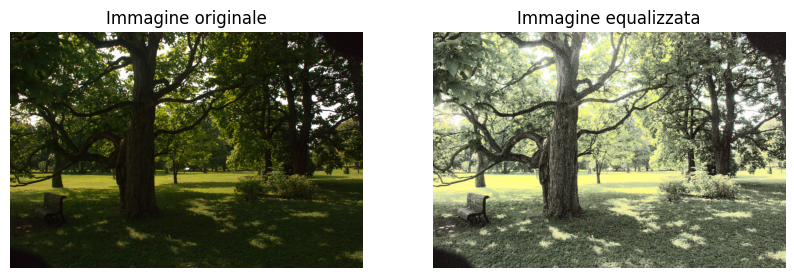

In [ ]:
# Confronto tra l'immagine originale e quella equalizzata
figure, assi = plt.subplots(1, 2, figsize=(10, 5))

assi[0].imshow(immagine)
assi[0].set_title('Immagine originale')
assi[0].axis('off')

assi[1].imshow(immagineEqualizzata)
assi[1].set_title('Immagine equalizzata')
assi[1].axis('off')

plt.show()